Análise de Crédito- Parte 1
Trilha 8

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [81]:
#Carregamento do Dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

data_src = pd.read_csv(url,names = names, delimiter=' ')
print(data_src.shape)
print (data_src.columns)
data_src.head()
data=data_src.copy()

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


In [82]:
#Busca por missings
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   existingchecking       1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credithistory          1000 non-null   object
 3   purpose                1000 non-null   object
 4   creditamount           1000 non-null   int64 
 5   savings                1000 non-null   object
 6   employmentsince        1000 non-null   object
 7   installmentrate        1000 non-null   int64 
 8   statussex              1000 non-null   object
 9   otherdebtors           1000 non-null   object
 10  residencesince         1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  otherinstallmentplans  1000 non-null   object
 14  housing                1000 non-null   object
 15  existingcredits       

In [83]:
#verificação do balanceamento das classes
data['classification'].value_counts()

1    700
2    300
Name: classification, dtype: int64

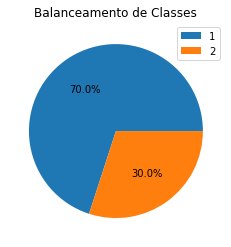

In [84]:
plt.pie(data['classification'].value_counts(),autopct='%1.1f%%')
plt.title('Balanceamento de Classes')
plt.legend(data['classification'].values)
plt.show()

In [85]:
#distribuições por classe
data1=data[data['classification']==1].copy()
data2=data[data['classification']==2].copy()
data1=data1.sample(frac=0.428)
#balanceamento
data=pd.concat((data1,data2),axis=0)
#embaralhar
data=data.sample(frac=1.0)
#len(data),data['classification'].sum()#checkings....

In [86]:
len(data1),len(data2),len(data)

(300, 300, 600)

Início do tratamento das features categóricas

In [87]:
x=pd.get_dummies(data['existingchecking'])


In [88]:
data['existingchecking'].value_counts()

A14    202
A11    190
A12    175
A13     33
Name: existingchecking, dtype: int64

In [89]:
x.head()

,A11,A12,A13,A14
656,0,1,0,0
775,1,0,0,0
414,1,0,0,0
74,1,0,0,0
768,0,1,0,0


In [90]:
data.insert(1,'ExistA11',x['A11'])
data.insert(2,'ExistA12',x['A12'])
data.insert(3,'ExistA13',x['A13'])
data.insert(4,'ExistA14',x['A14'])

In [91]:
data.head(10)

,existingchecking,ExistA11,ExistA12,ExistA13,ExistA14,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
656,A12,0,1,0,0,12,A32,A40,888,A61,A75,4,A93,A101,4,A123,41,A141,A152,1,A172,2,A191,A201,2
775,A11,1,0,0,0,24,A32,A40,1371,A65,A73,4,A92,A101,4,A121,25,A143,A151,1,A173,1,A191,A201,2
414,A11,1,0,0,0,24,A32,A40,1381,A65,A73,4,A92,A101,2,A122,35,A143,A152,1,A173,1,A191,A201,2
74,A11,1,0,0,0,36,A32,A46,1977,A65,A75,4,A93,A101,4,A124,40,A143,A152,1,A174,1,A192,A201,2
768,A12,0,1,0,0,12,A34,A42,3617,A61,A75,1,A93,A101,4,A123,28,A143,A151,3,A173,1,A192,A201,1
913,A14,0,0,0,1,11,A32,A49,2142,A64,A75,1,A91,A101,2,A121,28,A143,A152,1,A173,1,A192,A201,1
223,A14,0,0,0,1,24,A33,A49,2978,A65,A73,4,A93,A101,4,A121,32,A143,A152,2,A173,2,A192,A201,1
984,A14,0,0,0,1,24,A34,A42,2028,A61,A74,2,A93,A101,2,A122,30,A143,A152,2,A172,1,A191,A201,1
155,A11,1,0,0,0,12,A32,A42,1282,A61,A73,2,A92,A101,4,A123,20,A143,A151,1,A173,1,A191,A201,2
188,A11,1,0,0,0,12,A32,A43,674,A62,A74,4,A94,A101,1,A122,20,A143,A152,1,A173,1,A191,A201,2


In [92]:
x=pd.get_dummies(data['credithistory'])

In [93]:
x.head()

,A30,A31,A32,A33,A34
656,0,0,1,0,0
775,0,0,1,0,0
414,0,0,1,0,0
74,0,0,1,0,0
768,0,0,0,0,1


In [94]:
data.insert(7,'credhistA30',x['A30'])
data.insert(8,'credhistA31',x['A31'])
data.insert(9,'credhistA32',x['A32'])
data.insert(10,'credhistA33',x['A33'])
data.insert(11,'credhistA34',x['A34'])

In [95]:
data.head()

,existingchecking,ExistA11,ExistA12,ExistA13,ExistA14,duration,credithistory,credhistA30,credhistA31,credhistA32,credhistA33,credhistA34,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
656,A12,0,1,0,0,12,A32,0,0,1,0,0,A40,888,A61,A75,4,A93,A101,4,A123,41,A141,A152,1,A172,2,A191,A201,2
775,A11,1,0,0,0,24,A32,0,0,1,0,0,A40,1371,A65,A73,4,A92,A101,4,A121,25,A143,A151,1,A173,1,A191,A201,2
414,A11,1,0,0,0,24,A32,0,0,1,0,0,A40,1381,A65,A73,4,A92,A101,2,A122,35,A143,A152,1,A173,1,A191,A201,2
74,A11,1,0,0,0,36,A32,0,0,1,0,0,A46,1977,A65,A75,4,A93,A101,4,A124,40,A143,A152,1,A174,1,A192,A201,2
768,A12,0,1,0,0,12,A34,0,0,0,0,1,A42,3617,A61,A75,1,A93,A101,4,A123,28,A143,A151,3,A173,1,A192,A201,1


In [96]:
x=pd.get_dummies(data['purpose'])
x.head()

,A40,A41,A410,A42,A43,A44,A45,A46,A48,A49
656,1,0,0,0,0,0,0,0,0,0
775,1,0,0,0,0,0,0,0,0,0
414,1,0,0,0,0,0,0,0,0,0
74,0,0,0,0,0,0,0,1,0,0
768,0,0,0,1,0,0,0,0,0,0


In [97]:
data.insert(13,'purposeA40',x['A40'])
data.insert(14,'purposeA41',x['A41'])
data.insert(15,'purposeA410',x['A410'])
data.insert(16,'purposeA42',x['A42'])
data.insert(17,'purposeA43',x['A43'])
data.insert(18,'purposeA44',x['A44'])
data.insert(19,'purposeA45',x['A45'])
data.insert(20,'purposeA46',x['A46'])
data.insert(21,'purposeA48',x['A48'])
data.insert(22,'purposeA49',x['A49'])

In [98]:
data.columns[24]

'savings'

In [99]:
x=pd.get_dummies(data['savings'])
x.head()

,A61,A62,A63,A64,A65
656,1,0,0,0,0
775,0,0,0,0,1
414,0,0,0,0,1
74,0,0,0,0,1
768,1,0,0,0,0


In [100]:
data.insert(25,'savingsA61',x['A61'])
data.insert(26,'savingsA62',x['A62'])
data.insert(27,'savingsA63',x['A63'])
data.insert(28,'savingsA64',x['A64'])
data.insert(29,'savingsA65',x['A65'])


In [101]:
data[data.columns[20:38]].head()

,purposeA46,purposeA48,purposeA49,creditamount,savings,savingsA61,savingsA62,savingsA63,savingsA64,savingsA65,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans
656,0,0,0,888,A61,1,0,0,0,0,A75,4,A93,A101,4,A123,41,A141
775,0,0,0,1371,A65,0,0,0,0,1,A73,4,A92,A101,4,A121,25,A143
414,0,0,0,1381,A65,0,0,0,0,1,A73,4,A92,A101,2,A122,35,A143
74,1,0,0,1977,A65,0,0,0,0,1,A75,4,A93,A101,4,A124,40,A143
768,0,0,0,3617,A61,1,0,0,0,0,A75,1,A93,A101,4,A123,28,A143


In [102]:
data.columns[30]

'employmentsince'

In [103]:
x=pd.get_dummies(data['employmentsince'])
x.head()

,A71,A72,A73,A74,A75
656,0,0,0,0,1
775,0,0,1,0,0
414,0,0,1,0,0
74,0,0,0,0,1
768,0,0,0,0,1


In [104]:
data.insert(31,'employmA71',x['A71'])
data.insert(32,'employmA72',x['A72'])
data.insert(33,'employmA73',x['A73'])
data.insert(34,'employmA74',x['A74'])
data.insert(35,'employmA75',x['A75'])


In [105]:
data[data.columns[28:39]].head()

,savingsA64,savingsA65,employmentsince,employmA71,employmA72,employmA73,employmA74,employmA75,installmentrate,statussex,otherdebtors
656,0,0,A75,0,0,0,0,1,4,A93,A101
775,0,1,A73,0,0,1,0,0,4,A92,A101
414,0,1,A73,0,0,1,0,0,4,A92,A101
74,0,1,A75,0,0,0,0,1,4,A93,A101
768,0,0,A75,0,0,0,0,1,1,A93,A101


In [106]:
data.columns[37]

'statussex'

In [107]:
x=pd.get_dummies(data['statussex'])
x.head()

,A91,A92,A93,A94
656,0,0,1,0
775,0,1,0,0
414,0,1,0,0
74,0,0,1,0
768,0,0,1,0


In [108]:
data.insert(38,'statussex91',x['A91'])
data.insert(39,'statussex92',x['A92'])
data.insert(40,'statussex93',x['A93'])
data.insert(41,'statussex94',x['A94'])


In [109]:
data[data.columns[35:45]].head()

,employmA75,installmentrate,statussex,statussex91,statussex92,statussex93,statussex94,otherdebtors,residencesince,property
656,1,4,A93,0,0,1,0,A101,4,A123
775,0,4,A92,0,1,0,0,A101,4,A121
414,0,4,A92,0,1,0,0,A101,2,A122
74,1,4,A93,0,0,1,0,A101,4,A124
768,1,1,A93,0,0,1,0,A101,4,A123


In [110]:
data.columns[42]

'otherdebtors'

In [111]:
x=pd.get_dummies(data['otherdebtors'])
x.head()

,A101,A102,A103
656,1,0,0
775,1,0,0
414,1,0,0
74,1,0,0
768,1,0,0


In [112]:
data.insert(43,'otherdeb101',x['A101'])
data.insert(44,'otherdeb102',x['A102'])
data.insert(45,'otherdeb103',x['A103'])


In [113]:
data[data.columns[40:50]].head()

,statussex93,statussex94,otherdebtors,otherdeb101,otherdeb102,otherdeb103,residencesince,property,age,otherinstallmentplans
656,1,0,A101,1,0,0,4,A123,41,A141
775,0,0,A101,1,0,0,4,A121,25,A143
414,0,0,A101,1,0,0,2,A122,35,A143
74,1,0,A101,1,0,0,4,A124,40,A143
768,1,0,A101,1,0,0,4,A123,28,A143


In [114]:
data.columns[47]

'property'

In [115]:
x=pd.get_dummies(data['property'])
x.head()

,A121,A122,A123,A124
656,0,0,1,0
775,1,0,0,0
414,0,1,0,0
74,0,0,0,1
768,0,0,1,0


In [116]:
data.insert(48,'property121',x['A121'])
data.insert(49,'property122',x['A122'])
data.insert(50,'property123',x['A123'])
data.insert(51,'property124',x['A124'])

In [117]:
data[data.columns[47:57]].head(2)

,property,property121,property122,property123,property124,age,otherinstallmentplans,housing,existingcredits,job
656,A123,0,0,1,0,41,A141,A152,1,A172
775,A121,1,0,0,0,25,A143,A151,1,A173


In [118]:
data.columns[53]

'otherinstallmentplans'

In [119]:
x=pd.get_dummies(data['otherinstallmentplans'])
x.head()

,A141,A142,A143
656,1,0,0
775,0,0,1
414,0,0,1
74,0,0,1
768,0,0,1


In [120]:
data.insert(54,'otherinst141',x['A141'])
data.insert(55,'otherinst142',x['A142'])
data.insert(56,'otherinst143',x['A143'])


In [121]:
data[data.columns[55:62]].head(2)

,otherinst142,otherinst143,housing,existingcredits,job,peopleliable,telephone
656,0,0,A152,1,A172,2,A191
775,0,1,A151,1,A173,1,A191


In [122]:
data.columns[57]

'housing'

In [123]:
x=pd.get_dummies(data['housing'])
x.head()

,A151,A152,A153
656,0,1,0
775,1,0,0
414,0,1,0
74,0,1,0
768,1,0,0


In [124]:
data.insert(58,'housing151',x['A151'])
data.insert(59,'housing152',x['A152'])
data.insert(60,'housing153',x['A153'])


In [125]:
data[data.columns[55:65]].head(2)

,otherinst142,otherinst143,housing,housing151,housing152,housing153,existingcredits,job,peopleliable,telephone
656,0,0,A152,0,1,0,1,A172,2,A191
775,0,1,A151,1,0,0,1,A173,1,A191


In [126]:
data.columns[62]

'job'

In [127]:
x=pd.get_dummies(data['job'])
x.head()

,A171,A172,A173,A174
656,0,1,0,0
775,0,0,1,0
414,0,0,1,0
74,0,0,0,1
768,0,0,1,0


In [128]:
data.insert(63,'job171',x['A171'])
data.insert(64,'job172',x['A172'])
data.insert(65,'job173',x['A173'])
data.insert(66,'job174',x['A174'])

In [129]:
data[data.columns[60:70]].head(2)

,housing153,existingcredits,job,job171,job172,job173,job174,peopleliable,telephone,foreignworker
656,0,1,A172,0,1,0,0,2,A191,A201
775,0,1,A173,0,0,1,0,1,A191,A201


In [130]:
data.columns[68]

'telephone'

In [131]:
x=pd.get_dummies(data['telephone'])
x.head(2)

,A191,A192
656,1,0
775,1,0


In [132]:
data.insert(69,'tel191',x['A191'])
data.insert(70,'tel192',x['A192'])


In [133]:
data[data.columns[65:78]].head(2)

,job173,job174,peopleliable,telephone,tel191,tel192,foreignworker,classification
656,0,0,2,A191,1,0,A201,2
775,1,0,1,A191,1,0,A201,2


In [134]:
data.columns[71]

'foreignworker'

In [135]:
x=pd.get_dummies(data['foreignworker'])
x.head(2)

,A201,A202
656,1,0
775,1,0


In [136]:
data.insert(72,'foreig201',x['A201'])
data.insert(73,'foreig202',x['A202'])

In [137]:
data[data.columns[70:]].head(2)

,tel192,foreignworker,foreig201,foreig202,classification
656,0,A201,1,0,2
775,0,A201,1,0,2


In [138]:
data.columns

Index(['existingchecking', 'ExistA11', 'ExistA12', 'ExistA13', 'ExistA14',
       'duration', 'credithistory', 'credhistA30', 'credhistA31',
       'credhistA32', 'credhistA33', 'credhistA34', 'purpose', 'purposeA40',
       'purposeA41', 'purposeA410', 'purposeA42', 'purposeA43', 'purposeA44',
       'purposeA45', 'purposeA46', 'purposeA48', 'purposeA49', 'creditamount',
       'savings', 'savingsA61', 'savingsA62', 'savingsA63', 'savingsA64',
       'savingsA65', 'employmentsince', 'employmA71', 'employmA72',
       'employmA73', 'employmA74', 'employmA75', 'installmentrate',
       'statussex', 'statussex91', 'statussex92', 'statussex93', 'statussex94',
       'otherdebtors', 'otherdeb101', 'otherdeb102', 'otherdeb103',
       'residencesince', 'property', 'property121', 'property122',
       'property123', 'property124', 'age', 'otherinstallmentplans',
       'otherinst141', 'otherinst142', 'otherinst143', 'housing', 'housing151',
       'housing152', 'housing153', 'existingcredits

In [139]:
#antes de dropar colunas categóricas, vamos ver os counts

In [140]:
data['existingchecking'].value_counts()

A14    202
A11    190
A12    175
A13     33
Name: existingchecking, dtype: int64

In [141]:
data['credithistory'].value_counts()

A32    317
A34    164
A33     58
A31     35
A30     26
Name: credithistory, dtype: int64

In [142]:
data['purpose'].value_counts()

A43     155
A40     152
A42     113
A49      60
A41      55
A46      34
A45      15
A44       6
A410      6
A48       4
Name: purpose, dtype: int64

In [143]:
data['savings'].value_counts()

A61    378
A65    103
A62     65
A63     29
A64     25
Name: savings, dtype: int64

In [144]:
data['employmentsince'].value_counts()

A73    194
A75    156
A72    115
A74     96
A71     39
Name: employmentsince, dtype: int64

In [145]:
data['statussex'].value_counts()

A93    318
A92    200
A94     52
A91     30
Name: statussex, dtype: int64

In [146]:
data['otherdebtors'].value_counts()

A101    545
A102     29
A103     26
Name: otherdebtors, dtype: int64

In [147]:
data['property'].value_counts()

A123    192
A121    151
A122    147
A124    110
Name: property, dtype: int64

In [148]:
data['otherinstallmentplans'].value_counts()

A143    485
A141     83
A142     32
Name: otherinstallmentplans, dtype: int64

In [149]:
data['housing'].value_counts()

A152    408
A151    116
A153     76
Name: housing, dtype: int64

In [150]:
data['job'].value_counts()

A173    378
A172    111
A174     98
A171     13
Name: job, dtype: int64

In [151]:
data['telephone'].value_counts()

A191    356
A192    244
Name: telephone, dtype: int64

In [152]:
data['foreignworker'].value_counts()

A201    582
A202     18
Name: foreignworker, dtype: int64

Conhecendo as features (relacionamento com targets)

In [153]:
data1=data[data['classification']==1].copy()
data2=data[data['classification']==2].copy()

In [154]:
len(data)

600

In [155]:
len(data1),len(data2)

(300, 300)

<BarContainer object of 10 artists>

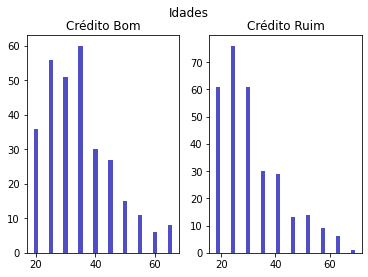

In [156]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Idades')
hist1,bin_edges1 = np.histogram(data1['age'])
hist2,bin_edges2 = np.histogram(data2['age'])
ax1.set_title('Crédito Bom')
ax1.bar(bin_edges1[:-1], hist1, width = 1.5, color='#0504aa',alpha=0.7)
ax2.set_title('Crédito Ruim')
ax2.bar(bin_edges2[:-1], hist2, width = 1.5, color='#0504aa',alpha=0.7)


<BarContainer object of 10 artists>

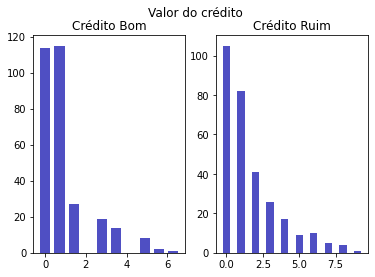

In [157]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Valor do crédito')
m1=data1['creditamount'].max()
m2=data2['creditamount'].max()
m=max(m1,m2)
cam1=data1['creditamount']//(m//10)
cam2=data2['creditamount']//(m//10)
hist1,bin_edges1 = np.histogram(cam1)
hist2,bin_edges2 = np.histogram(cam2)
ax1.set_title('Crédito Bom')
ax1.bar(bin_edges1[:-1], hist1, width = 0.5, color='#0504aa',alpha=0.7)
ax2.set_title('Crédito Ruim')
ax2.bar(bin_edges2[:-1], hist2, width = 0.5, color='#0504aa',alpha=0.7)


(0.06333333333333334, 0.02)

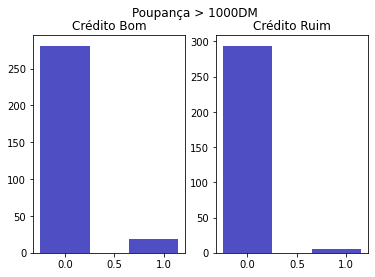

In [158]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Poupança > 1000DM')
hist1,bin_edges1 = np.histogram(data1['savingsA64'])
hist2,bin_edges2 = np.histogram(data2['savingsA64'])
ax1.set_title('Crédito Bom')
ax1.bar(bin_edges1[:-1], hist1, width = 0.5, color='#0504aa',alpha=0.7)
ax2.set_title('Crédito Ruim')
ax2.bar(bin_edges2[:-1], hist2, width = 0.5, color='#0504aa',alpha=0.7)
data1['savingsA64'].sum()/len(data1),data2['savingsA64'].sum()/len(data2)

(0.74, 0.62)

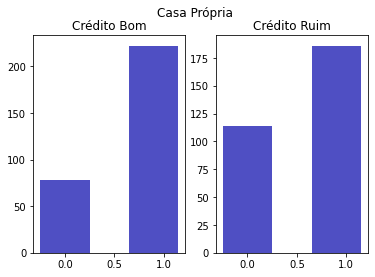

In [159]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Casa Própria')
hist1,bin_edges1 = np.histogram(data1['housing152'])
hist2,bin_edges2 = np.histogram(data2['housing152'])
ax1.set_title('Crédito Bom')
ax1.bar(bin_edges1[:-1], hist1, width = 0.5, color='#0504aa',alpha=0.7)
ax2.set_title('Crédito Ruim')
ax2.bar(bin_edges2[:-1], hist2, width = 0.5, color='#0504aa',alpha=0.7)
data1['housing152'].sum()/len(data1),data2['housing152'].sum()/len(data2)

(0.02, 0.023333333333333334)

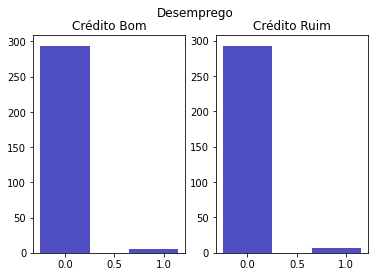

In [160]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Desemprego')
hist1,bin_edges1 = np.histogram(data1['job171'])
hist2,bin_edges2 = np.histogram(data2['job171'])
ax1.set_title('Crédito Bom')
ax1.bar(bin_edges1[:-1], hist1, width = 0.5, color='#0504aa',alpha=0.7)
ax2.set_title('Crédito Ruim')
ax2.bar(bin_edges2[:-1], hist2, width = 0.5, color='#0504aa',alpha=0.7)
data1['job171'].sum()/len(data1),data2['job171'].sum()/len(data2)

(0.023333333333333334, 0.09333333333333334)

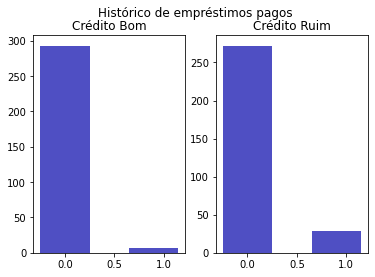

In [161]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Histórico de empréstimos pagos')
hist1,bin_edges1 = np.histogram(data1['credhistA31'])
hist2,bin_edges2 = np.histogram(data2['credhistA31'])
ax1.set_title('Crédito Bom')
ax1.bar(bin_edges1[:-1], hist1, width = 0.5, color='#0504aa',alpha=0.7)
ax2.set_title('Crédito Ruim')
ax2.bar(bin_edges2[:-1], hist2, width = 0.5, color='#0504aa',alpha=0.7)
data1['credhistA31'].sum()/len(data1),data2['credhistA31'].sum()/len(data2)

Text(0.5, 1.0, 'Crédito Ruim')

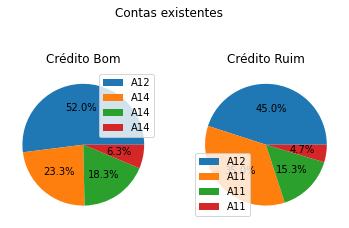

In [162]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Contas existentes')

ax1.pie(data1['existingchecking'].value_counts(),autopct='%1.1f%%')
ax1.legend(data1['existingchecking'].values)
ax1.set_title('Crédito Bom')

ax2.pie(data2['existingchecking'].value_counts(),autopct='%1.1f%%')
ax2.legend(data2['existingchecking'].values)
ax2.set_title('Crédito Ruim')

Text(0.5, 1.0, 'Crédito Ruim')

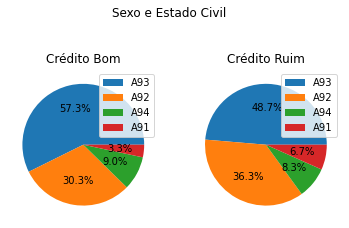

In [163]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Sexo e Estado Civil')

ax1.pie(data1['statussex'].value_counts(),autopct='%1.1f%%')
ax1.legend(data1['statussex'].value_counts().index)
ax1.set_title('Crédito Bom')

ax2.pie(data2['statussex'].value_counts(),autopct='%1.1f%%')
ax2.legend(data2['statussex'].value_counts().index)
ax2.set_title('Crédito Ruim')

In [164]:
data=data.drop(labels=['existingchecking','credithistory','purpose','savings','employmentsince','statussex', 'otherdebtors','property','otherinstallmentplans','housing', 'job','telephone','foreignworker'],axis=1)

In [165]:
data.head()

,ExistA11,ExistA12,ExistA13,ExistA14,duration,credhistA30,credhistA31,credhistA32,credhistA33,credhistA34,purposeA40,purposeA41,purposeA410,purposeA42,purposeA43,purposeA44,purposeA45,purposeA46,purposeA48,purposeA49,creditamount,savingsA61,savingsA62,savingsA63,savingsA64,savingsA65,employmA71,employmA72,employmA73,employmA74,employmA75,installmentrate,statussex91,statussex92,statussex93,statussex94,otherdeb101,otherdeb102,otherdeb103,residencesince,property121,property122,property123,property124,age,otherinst141,otherinst142,otherinst143,housing151,housing152,housing153,existingcredits,job171,job172,job173,job174,peopleliable,tel191,tel192,foreig201,foreig202,classification
656,0,1,0,0,12,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,888,1,0,0,0,0,0,0,0,0,1,4,0,0,1,0,1,0,0,4,0,0,1,0,41,1,0,0,0,1,0,1,0,1,0,0,2,1,0,1,0,2
775,1,0,0,0,24,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1371,0,0,0,0,1,0,0,1,0,0,4,0,1,0,0,1,0,0,4,1,0,0,0,25,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,2
414,1,0,0,0,24,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1381,0,0,0,0,1,0,0,1,0,0,4,0,1,0,0,1,0,0,2,0,1,0,0,35,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,2
74,1,0,0,0,36,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1977,0,0,0,0,1,0,0,0,0,1,4,0,0,1,0,1,0,0,4,0,0,0,1,40,0,0,1,0,1,0,1,0,0,0,1,1,0,1,1,0,2
768,0,1,0,0,12,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,3617,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,4,0,0,1,0,28,0,0,1,1,0,0,3,0,0,1,0,1,0,1,1,0,1


In [167]:
data.to_csv('german_categ_bal_full.csv')#Novo csv para criação de modelos